<h2><center> Bay Wheels (Ford GoBike) Data Exploration and Visualization</center></h2>


Bay Wheels also known as Ford GoBike is a bike sharing system which is founded in 29th August 2013 and now owned by Lyft.It is one of the largest bike sharing system with more than 262 stations in California's San Fransico Bay Area to facilitate public to roam around the city without any hassle.

This data exploration and visualisation project is all about exploring the Bay Wheels available data on their website. The data used for this project is from January, 2018 to December 2019 and has 4370704 rows and 15 columns for exploration.

### Structure of dataset
    Rows = 4370704
    Columns = 15

#### The Data
Each trip is anonymized and includes:

    Trip Duration (seconds)
    Start Time and Date
    End Time and Date
    Start Station ID
    Start Station Name
    Start Station Latitude
    Start Station Longitude
    End Station ID
    End Station Name
    End Station Latitude
    End Station Longitude
    Bike ID
    User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    Bike Share for all Trip
    Rental Access Method

### Preliminary Wrangling

#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

In [ ]:
# Combining all csv files from 2018 to 2019 in a list.
extension = 'csv'
all_csv_files = [i for i in glob.glob('*.{}'.format(extension))]


In [ ]:
# Merging all data into one csv file
bike_data = pd.concat([pd.read_csv(f) for f in all_csv_files ])
bike_data.to_csv('full_data.csv', index = False, encoding='utf-8-sig')

In [2]:
# Reading the csv data
bike_all_data = pd.read_csv('full_data.csv', sep=',')
bike_all_data.head()

C:\ProgramData\Anaconda3\envs\data_analyst\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,NaN
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,NaN
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,NaN
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,NaN
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,NaN


#### Checking Shape of Data

In [3]:
bike_all_data.shape

(4370704, 15)

#### Checking and cleaning the data

In [7]:
bike_all_data.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             92505
start_station_name           91904
start_station_latitude           0
start_station_longitude          0
end_station_id               94673
end_station_name             94121
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       4249866
dtype: int64

In [8]:
bike_all_data.duplicated().sum()

0

In [9]:
bike_all_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,4.370704e+06,4.278199e+06,4.370704e+06,4.370704e+06,4.276031e+06,4.370704e+06,4.370704e+06,4.370704e+06
mean,8.288215e+02,1.348904e+02,3.776580e+01,-1.223496e+02,1.320798e+02,3.776536e+01,-1.223471e+02,1.698155e+04
std,2.152483e+03,1.141269e+02,1.242493e-01,2.577378e-01,1.134725e+02,1.939181e-01,5.469663e-01,8.772065e+04
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.550000e+02,4.200000e+01,3.777008e+01,-1.224117e+02,3.600000e+01,3.777041e+01,-1.224113e+02,1.553000e+03
50%,5.640000e+02,9.700000e+01,3.778079e+01,-1.223983e+02,9.300000e+01,3.778101e+01,-1.223974e+02,3.004000e+03
75%,8.810000e+02,2.130000e+02,3.779539e+01,-1.222902e+02,2.050000e+02,3.779625e+01,-1.222914e+02,5.104000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [10]:
bike_all_data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object

In [11]:
# Removing null values in the rows of the dataframe to make the data perfect for analysis
bike_data_clean = bike_all_data[bike_all_data['start_station_id'].isnull() == False]
bike_data_clean = bike_data_clean[bike_all_data['end_station_id'].isnull() == False]
bike_data_clean = bike_data_clean[bike_all_data['bike_share_for_all_trip'].isnull() == False]

C:\ProgramData\Anaconda3\envs\data_analyst\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\data_analyst\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [12]:
bike_data_clean.shape

(4114929, 15)

In [13]:
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114929 entries, 0 to 4219191
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 502.3+ MB


In [14]:
bike_data_clean.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id                 0
start_station_name               0
start_station_latitude           0
start_station_longitude          0
end_station_id                   0
end_station_name                 0
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip          0
rental_access_method       4114929
dtype: int64

In [15]:
bike_data_clean.drop('rental_access_method', axis=1, inplace = True)

In [16]:
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114929 entries, 0 to 4219191
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 470.9+ MB


In [17]:
bike_data_clean.isna().any().sum()

0

In [18]:
bike_data_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [19]:
# Changing the wrong datatypes columns for analysis and visualization
bike_data_clean.start_time = pd.to_datetime(bike_data_clean.start_time)
bike_data_clean.end_time = pd.to_datetime(bike_data_clean.end_time)
bike_data_clean.bike_id = bike_data_clean.bike_id.astype('str')


In [20]:
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114929 entries, 0 to 4219191
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(6), int64(1), object(5)
memory usage: 470.9+ MB


In [21]:
bike_data_clean.user_type.value_counts()

Subscriber    3435786
Customer       679143
Name: user_type, dtype: int64

In [22]:
# Making separate columns for minute, hour, day of week and month from duration_sec and start time columns.

bike_data_clean['duration_minutes'] = bike_data_clean['duration_sec']/60
bike_data_clean['ride_start_date'] = bike_data_clean.start_time.dt.date
bike_data_clean['ride_start_hour'] = bike_data_clean.start_time.dt.hour
bike_data_clean['ride_start_day_of_week'] = bike_data_clean.start_time.dt.strftime('%A')
bike_data_clean['ride_start_month'] = bike_data_clean.start_time.dt.strftime('%B')

In [23]:
bike_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_minutes,ride_start_date,ride_start_hour,ride_start_day_of_week,ride_start_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1254.733333,2018-01-31,22,Wednesday,January
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,1423.700000,2018-01-31,16,Wednesday,January
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,1192.933333,2018-01-31,14,Wednesday,January
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,1017.933333,2018-01-31,14,Wednesday,January
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,666.100000,2018-01-31,19,Wednesday,January


In [24]:
bike_data_clean.shape

(4114929, 19)

In [25]:
# Copy clean data

rides = bike_data_clean.copy()

In [26]:
# Saving Master Data
rides.to_csv('bike_master_clean.csv', index = False)

In [27]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114929 entries, 0 to 4219191
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  duration_minutes         float64       
 15  ride_start_date          object        
 16  ride_start_hour          int64         
 17  ride_start_day_of_week   ob

### What is/are the main feature(s) of interest in your dataset?
The main feature of interest in the dataset is ride duration in days of week and in a month as well as which ride user is mostly taking this ride share service.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The features are:

        duration_minutes
        user_type
        ride_start_hour
        ride_start_day_of_week
        ride_start_month         

### Univariate Obsetvations

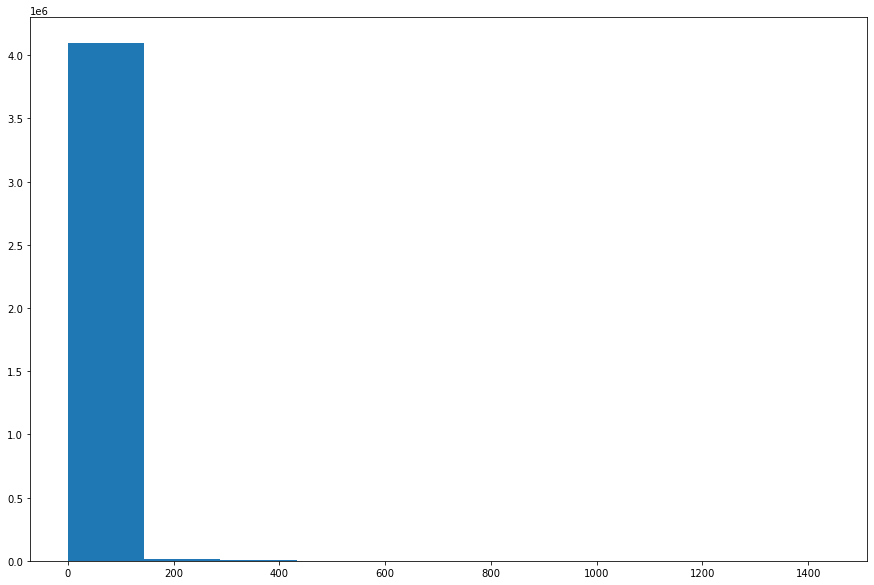

In [28]:
plt.figure(figsize=(15,10))

plt.hist(data = rides, x = 'duration_minutes');

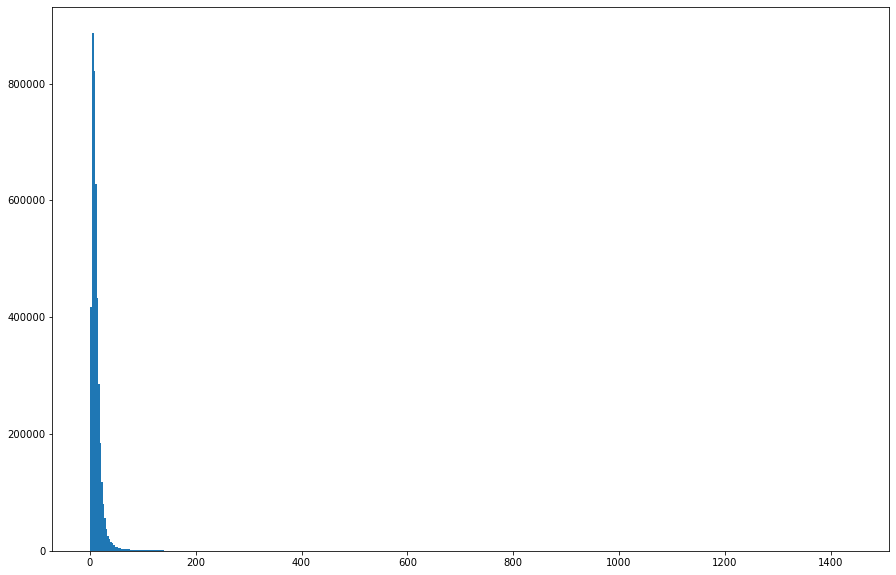

In [29]:
## Using bin size in the above plot

bin_size = 500
plt.figure(figsize=(15,10))
plt.hist(data = rides, x = 'duration_minutes', bins = bin_size);

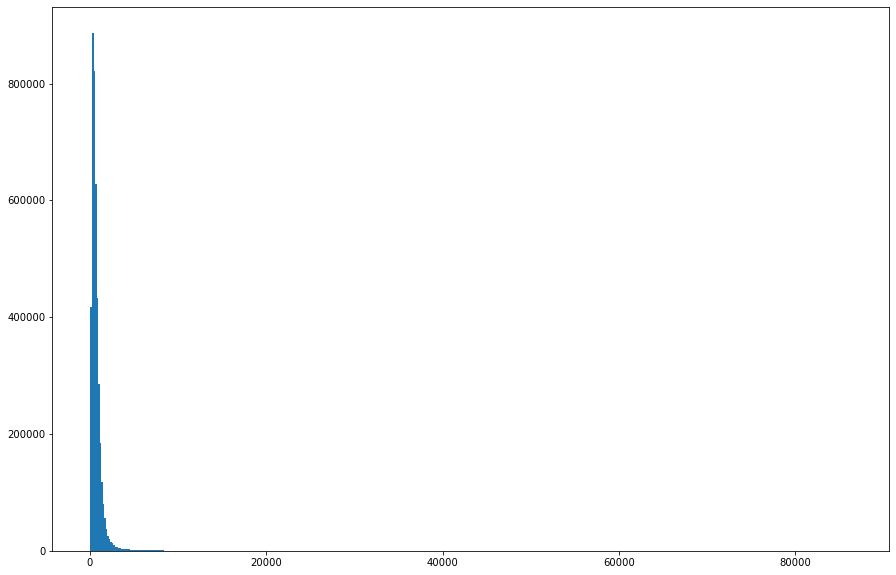

In [30]:
plt.figure(figsize=(15,10))
plt.hist(data = rides, x = 'duration_sec', bins = bin_size);

Average Duration of Ride in Minutes: 13.7944003610593


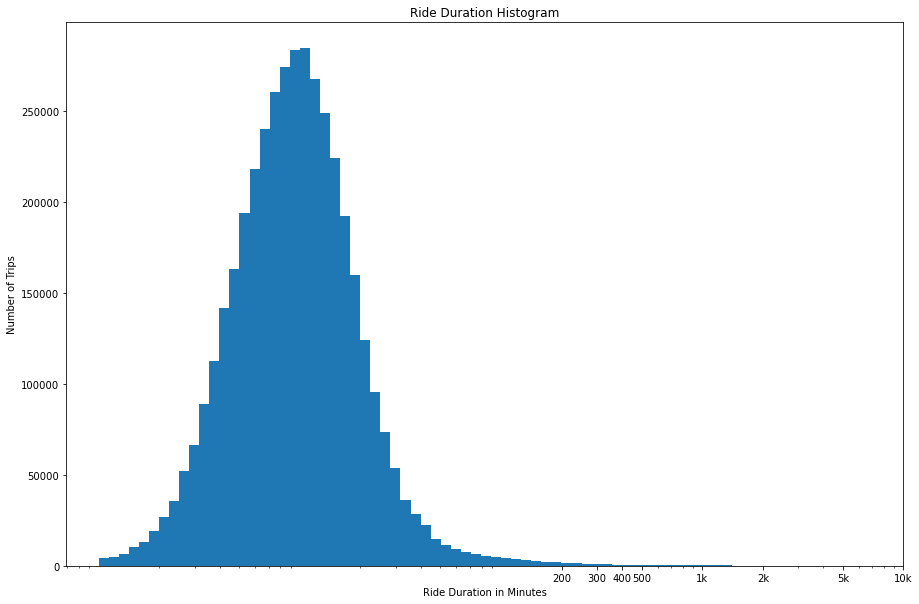

In [46]:
# Checking the above plot on log scale as there is a long tail exists in the data.
plt.figure(figsize=(15,10))

log_bin = 10 ** np.arange(0, np.log10(rides['duration_minutes'].max()) + 0.05, 0.05)
plt.hist(data = rides, x = 'duration_minutes', bins = log_bin);
plt.title('Ride Duration Histogram');
plt.xlabel('Ride Duration in Minutes');
plt.ylabel('Number of Trips');
plt.xscale('log');
plt.xticks([200,300,400, 500, 1e3, 2e3, 5e3, 1e4], [200,300,400,500, '1k', '2k', '5k', '10k']);
print('Average Duration of Ride in Minutes:', rides.duration_minutes.mean())

Above histogram shows that the most of the rides are less than 200 minutes and the average ride is of approximately <b>14 minutes </b>.

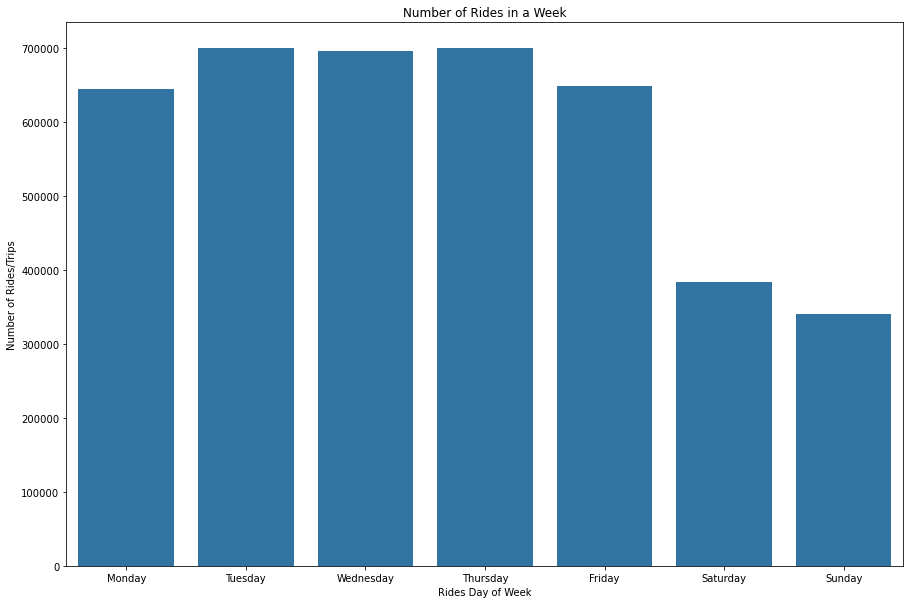

In [47]:
plt.figure(figsize=(15,10))
color = sns.color_palette()[0]
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data= rides, x = 'ride_start_day_of_week', color = color, order = order)
plt.title('Number of Rides in a Week');
plt.xlabel('Rides Day of Week');
plt.ylabel('Number of Rides/Trips');

Tuesday and Thursday has the maximum number of rides/Trips while Sunday has very low number of rides as compared to other days of the week.

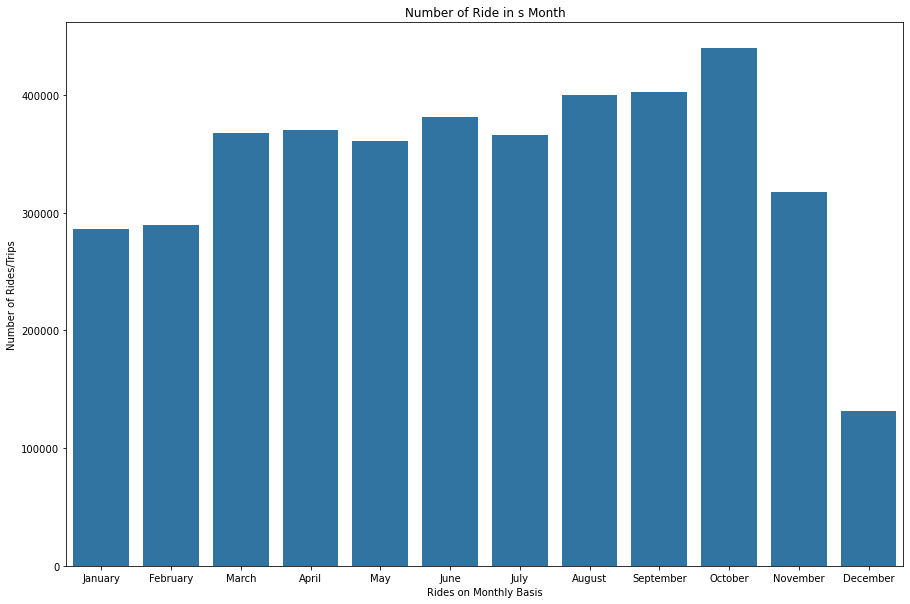

In [48]:
plt.figure(figsize=(15,10))
color = sns.color_palette()[0]
sns.countplot(data= rides, x = 'ride_start_month', color = color);
plt.title('Number of Ride in s Month');
plt.xlabel('Rides on Monthly Basis');
plt.ylabel('Number of Rides/Trips');

According to above plot month of October exceeded all other months in terms of number of rides while December has the lowest number of rides may be due to Christmas holidays.

Subscriber    3435786
Customer       679143
Name: user_type, dtype: int64


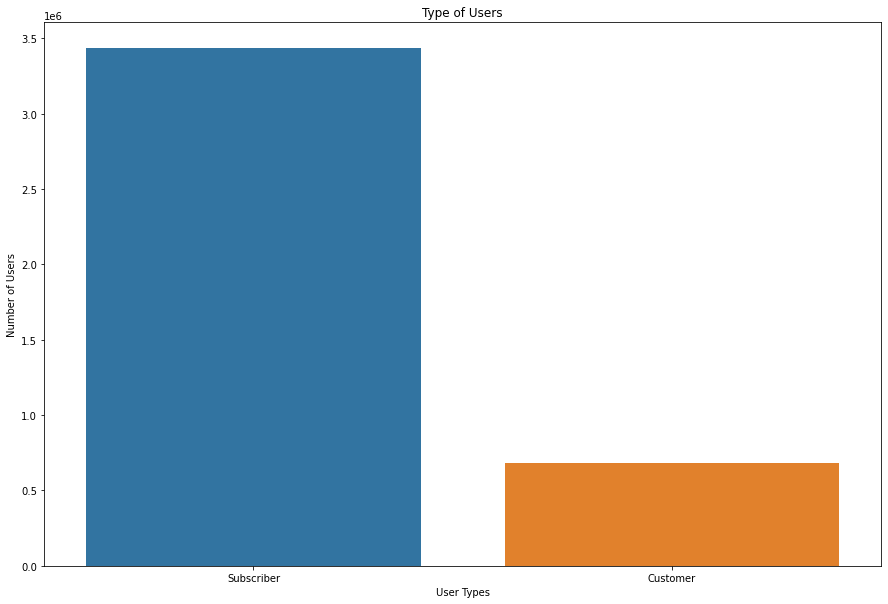

In [49]:
plt.figure(figsize=(15,10))
color = sns.color_palette()[0]
sns.countplot(data= rides, x = 'user_type');
plt.title('Type of Users');
plt.xlabel('User Types');
plt.ylabel('Number of Users');
print (rides.user_type.value_counts());

There are two types of ride sharing users one is Subscriber who owns the membership and other one is casual which is also called customer. According to above plot majority of the bike users are subscribers with the total number of <b>3435786</b> while customers are only <b>679143</b>.

### Bivariate Observations

Text(0, 0.5, 'Duration of Ride in Minutes')

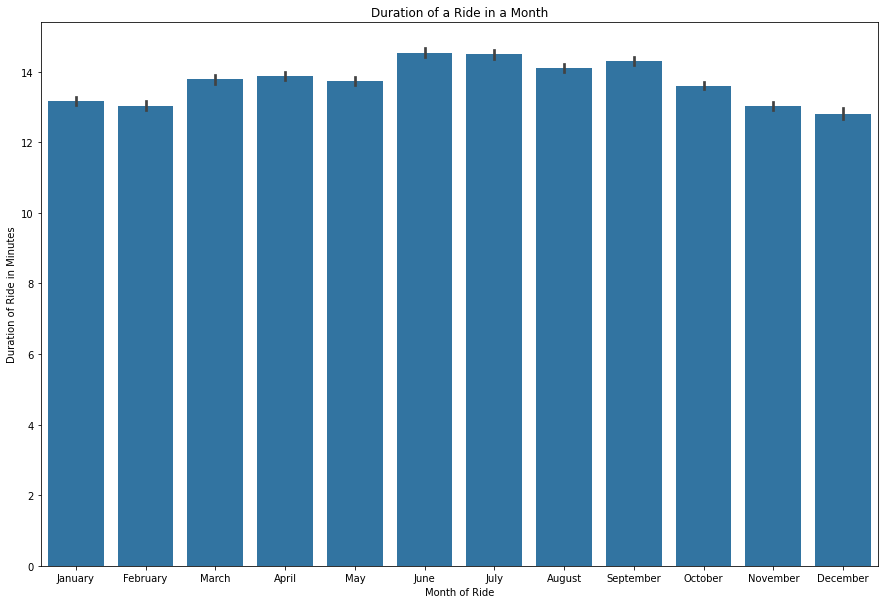

In [39]:
plt.figure(figsize=(15,10))
color = sns.color_palette()[0];
sns.barplot(data = rides, x='ride_start_month', y = 'duration_minutes' , color = color);
plt.title('Duration of a Ride in a Month')
plt.xlabel('Month of Ride')
plt.ylabel('Duration of Ride in Minutes')

Month of June and July has maximum duration of rides with more than 14 minutes while duration of rides in February, November and December are very low as compared to other months.

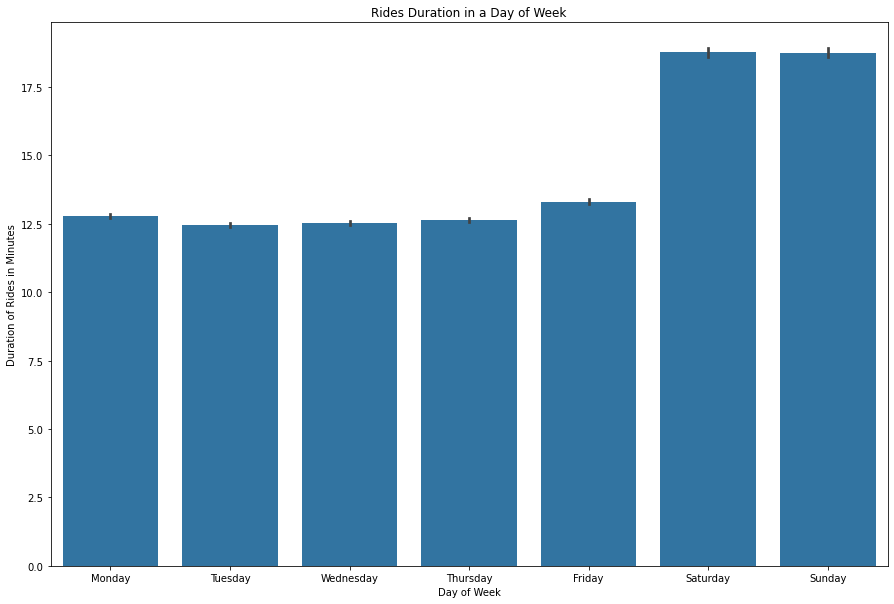

In [40]:
plt.figure(figsize=(15,10))
color = sns.color_palette()[0]
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data = rides, x='ride_start_day_of_week', y = 'duration_minutes' , color = color, order= order);
plt.title('Rides Duration in a Day of Week');
plt.xlabel('Day of Week');
plt.ylabel('Duration of Rides in Minutes');

Average duration of a ride on Saturday and Sunday is much higher than all other days of the week.

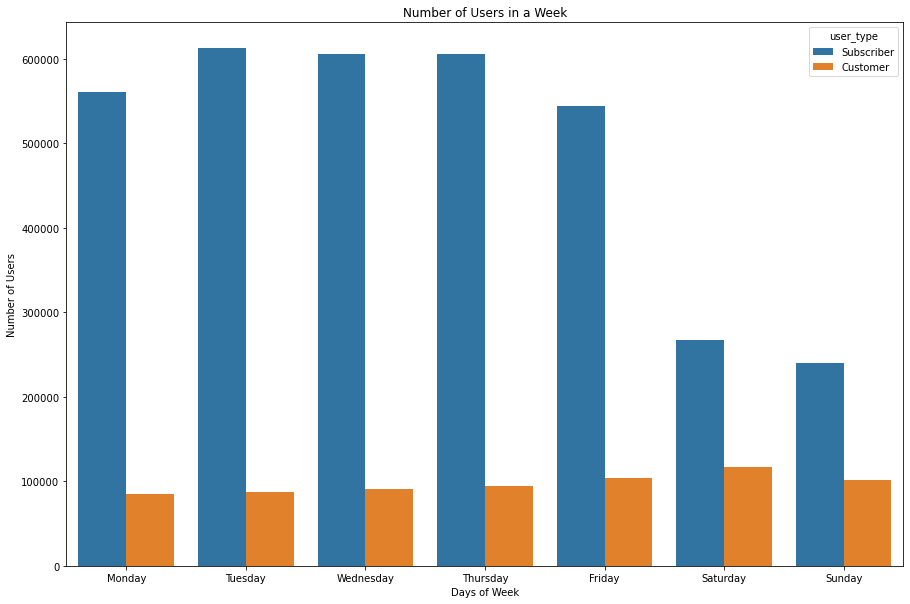

In [41]:
plt.figure(figsize=(15,10))
color = sns.color_palette()[0]
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data = rides, x='ride_start_day_of_week', hue= 'user_type', order = order);
plt.title('Number of Users in a Week')
plt.xlabel('Days of Week');
plt.ylabel('Number of Users');

On Tuesday number of subscriber users are pretty much high in numbers while on Saturday number of casual riders are higher than any other day of the week and on Sunday subscribers have very low numbers as compared to other days.

### Multivariate Observations

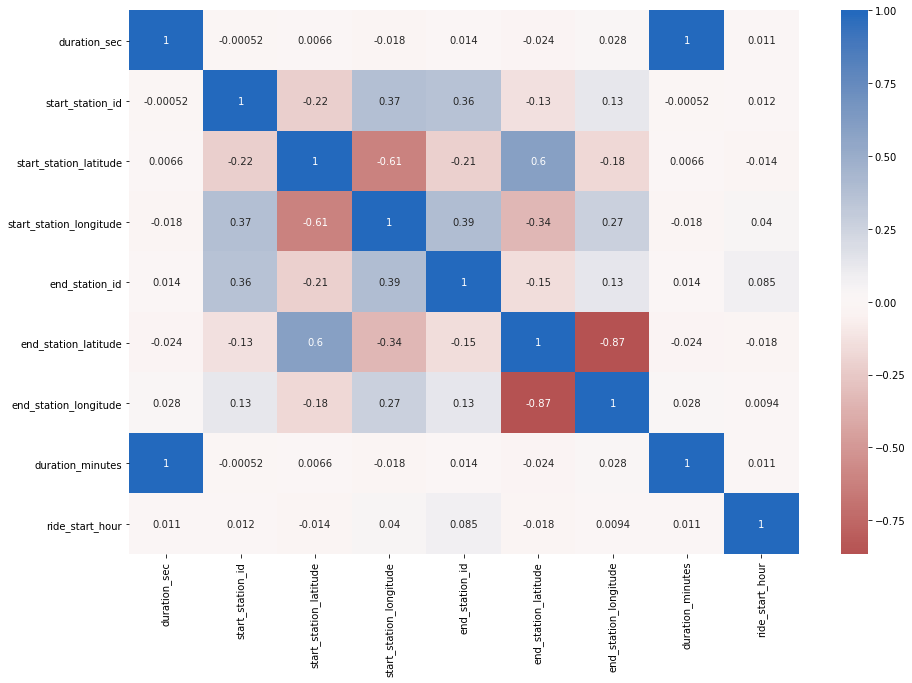

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(rides.corr(), annot = True, cmap = 'vlag_r', center = 0);

Accordig to above correlation map there is not any much stronger relationship between the variables.

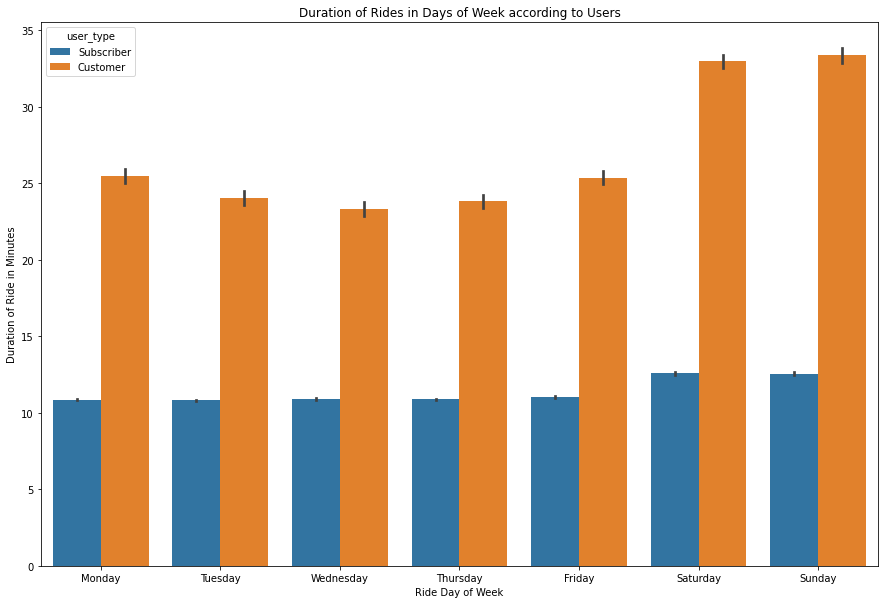

In [44]:
plt.figure(figsize=(15,10))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data = rides, x = 'ride_start_day_of_week', y= 'duration_minutes', hue = 'user_type', order = order)
plt.title('Duration of Rides in Days of Week according to Users');
plt.xlabel('Ride Day of Week');
plt.ylabel('Duration of Rides in Minutes');

Casual riders took longer rides as compared to subscribers while on Saturday and Sunday the average duration of casual riders are much higher than the subscribers.

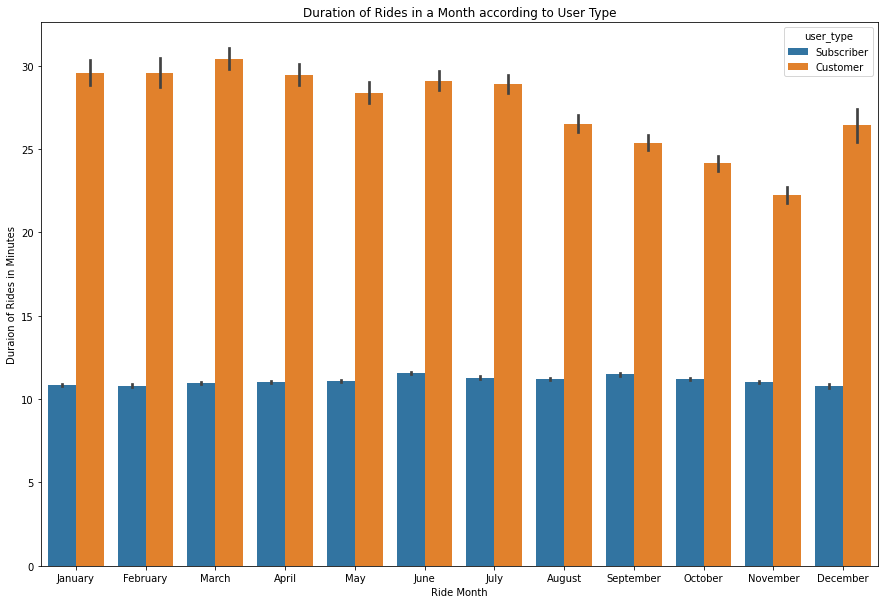

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(data = rides, x = 'ride_start_month', y= 'duration_minutes', hue = 'user_type');
plt.title('Duration of Rides in a Month according to User Type');
plt.xlabel('Ride Month');
plt.ylabel('Duraion of Rides in Minutes');

The data shows that the overall in each month the number of casual riders are much higher in taking longer rides while the subsribers or membership owner riders took somehow similar duration of rides in every month as well as their duration of rides are too shorter than the casual/customer riders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

According to my observation and analysis, all of the variables are independent and they do not have any strong relationship with each other.

### Were there any interesting or surprising interactions between features?

Interestingly the casual riders took longer duration of rides as compared to the membership(subsribers) owners and the number of riders on Saturday and Sunday are much lower than any other day beside that the average duration of a ride is much higher on Saturday and Sunday.

There is shorter number of rides/trips in the month of December while October has higher number of rides.